In [1]:
!pip install aubio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.0/479.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aubio: filename=aubio-0.4.9-cp312-cp312-linux_x86_64.whl size=427202 sha256=d08bbf8b998d2b4a876d365eefd6632f7b4066b759dc136bbf82fd08f3f24c64
  Stored in directory: /root/.cache/pip/wheels/dc/f6/4d/055c33068498ff1169c4f8238872d247ded62e80ab8aedca1b
Successfully built aubio


In [19]:
read

16

In [25]:
# https://stackoverflow.com/a/54621604/19470749 CC BY-SA 4.0

import sys
from aubio import source, pitch
import numpy as np


your_file = "a.wav"
samplerate = 44100

#(suggest not modify this line) the big win_s will get better analyze but take more time
win_s = 4096

#the small hop_s will get better analyze but take more time
hop_s = 16

# https://aubio.org/manual/latest/py_io.html?highlight=source#aubio.source
s = source(your_file, samplerate=samplerate, hop_size=hop_s)
samplerate = s.samplerate
print(samplerate)
tolerance = 1

# https://aubio.org/manual/latest/py_analysis.html?highlight=pitch#aubio.pitch
pitch_o = pitch(method="yin", buf_size=win_s, hop_size=hop_s, samplerate=samplerate)
pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitches = []
confidences = []

total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitches += [pitch]
    confidence = pitch_o.get_confidence()
    confidences += [confidence]
    total_frames += read
    print("\r",total_frames,"/",s.duration,"%.4f"%(total_frames/s.duration),end="")
    if read < hop_s: break

44100
 302336 / 302336 1.0000

In [ ]:
# pre = -1
# tmp = [0,"0"]
# pitchs = []
# for i in pitches:
#   i = int(i)
#   if i>pre or i<pre:
#     print("\n\n",tmp[0],"\n",tmp[1],sep="",end="")
#     pitchs.append([tmp[0],len(tmp[1])])
#     tmp[0] = i
#     tmp[1] = "1"
#   else:
#     tmp[1]+="1"
#   pre = i
# print("\n\n",tmp[0],"\n",tmp[1],sep="",end="")

In [ ]:
# pitchs

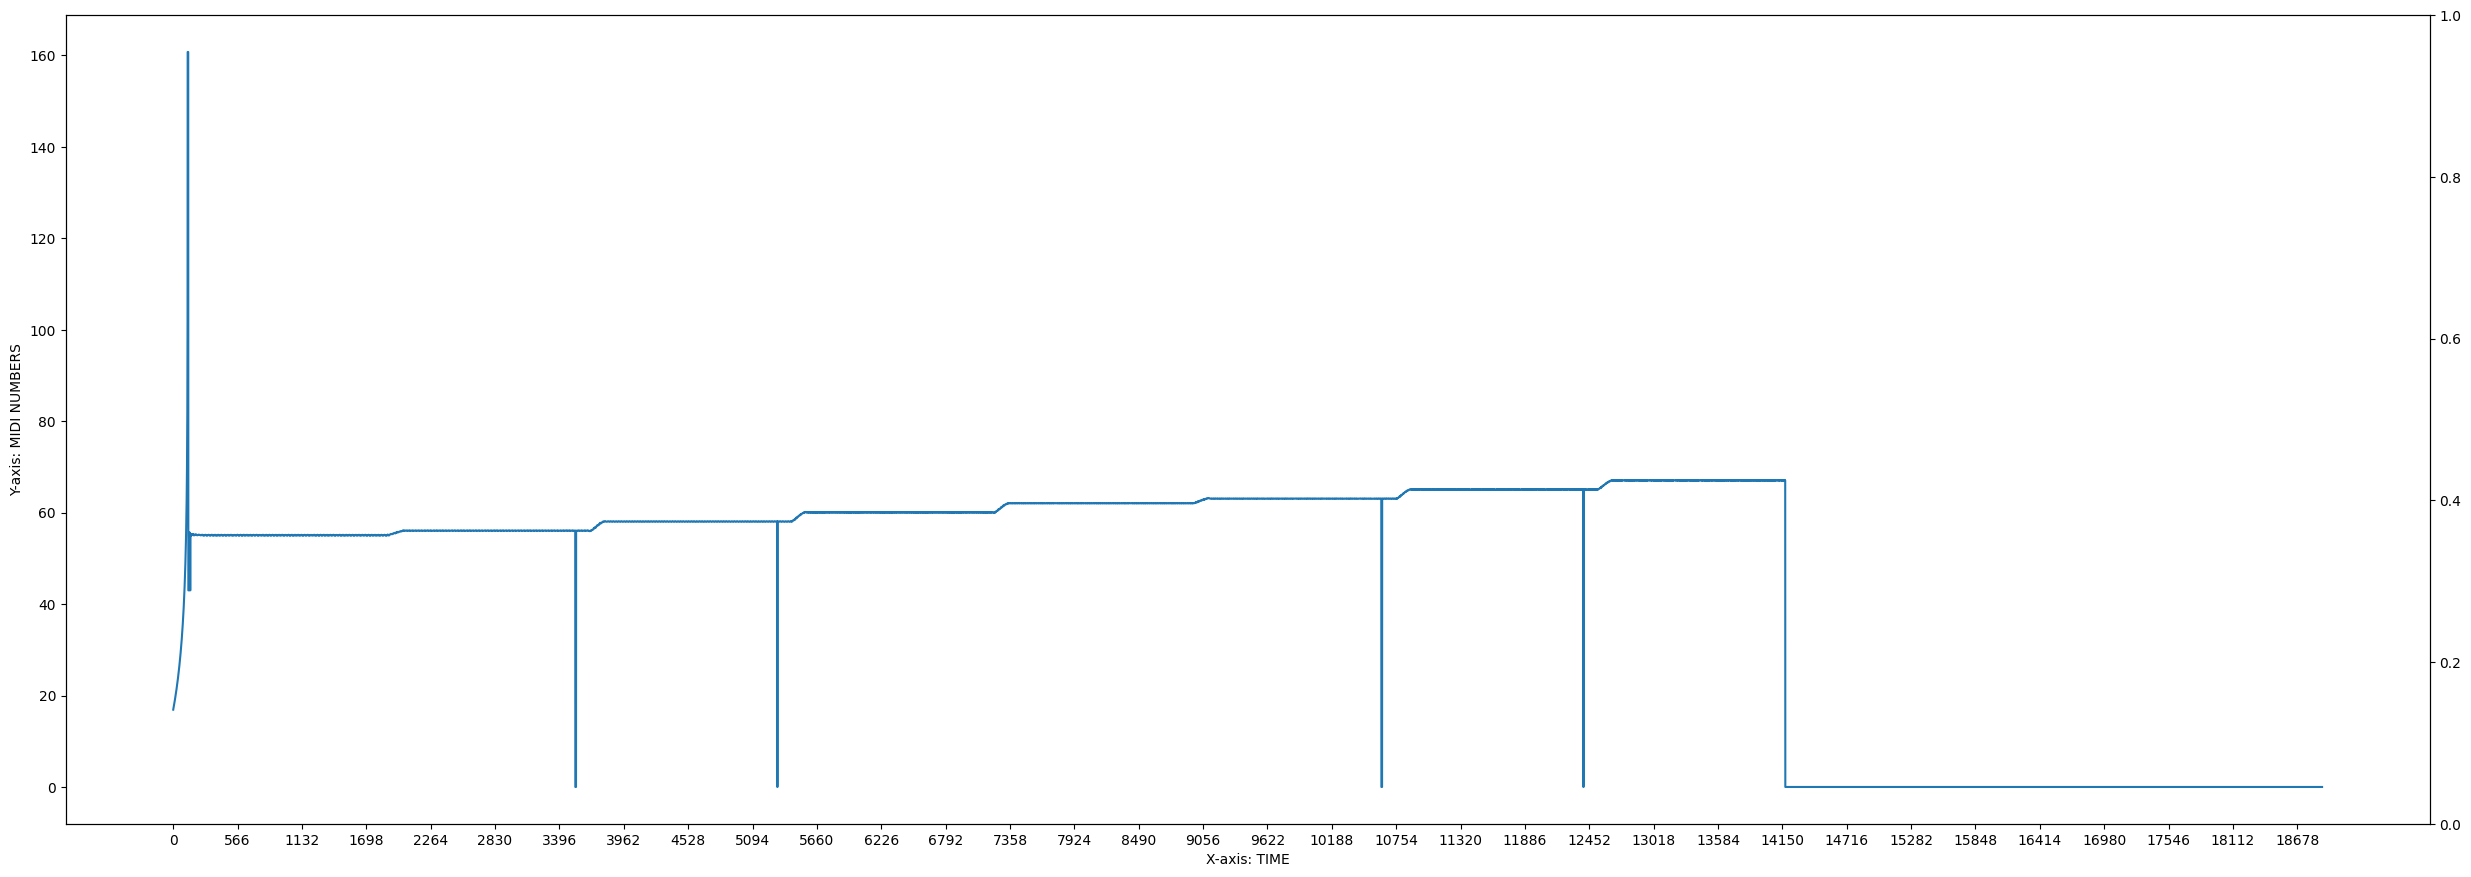

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [i for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: MIDI NUMBERS")


ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax2 = ax.twinx()
#ax2.set_xticklabels([ "%02d:%02d" % (t/float(samplerate)*hop_s/60, (t/float(samplerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

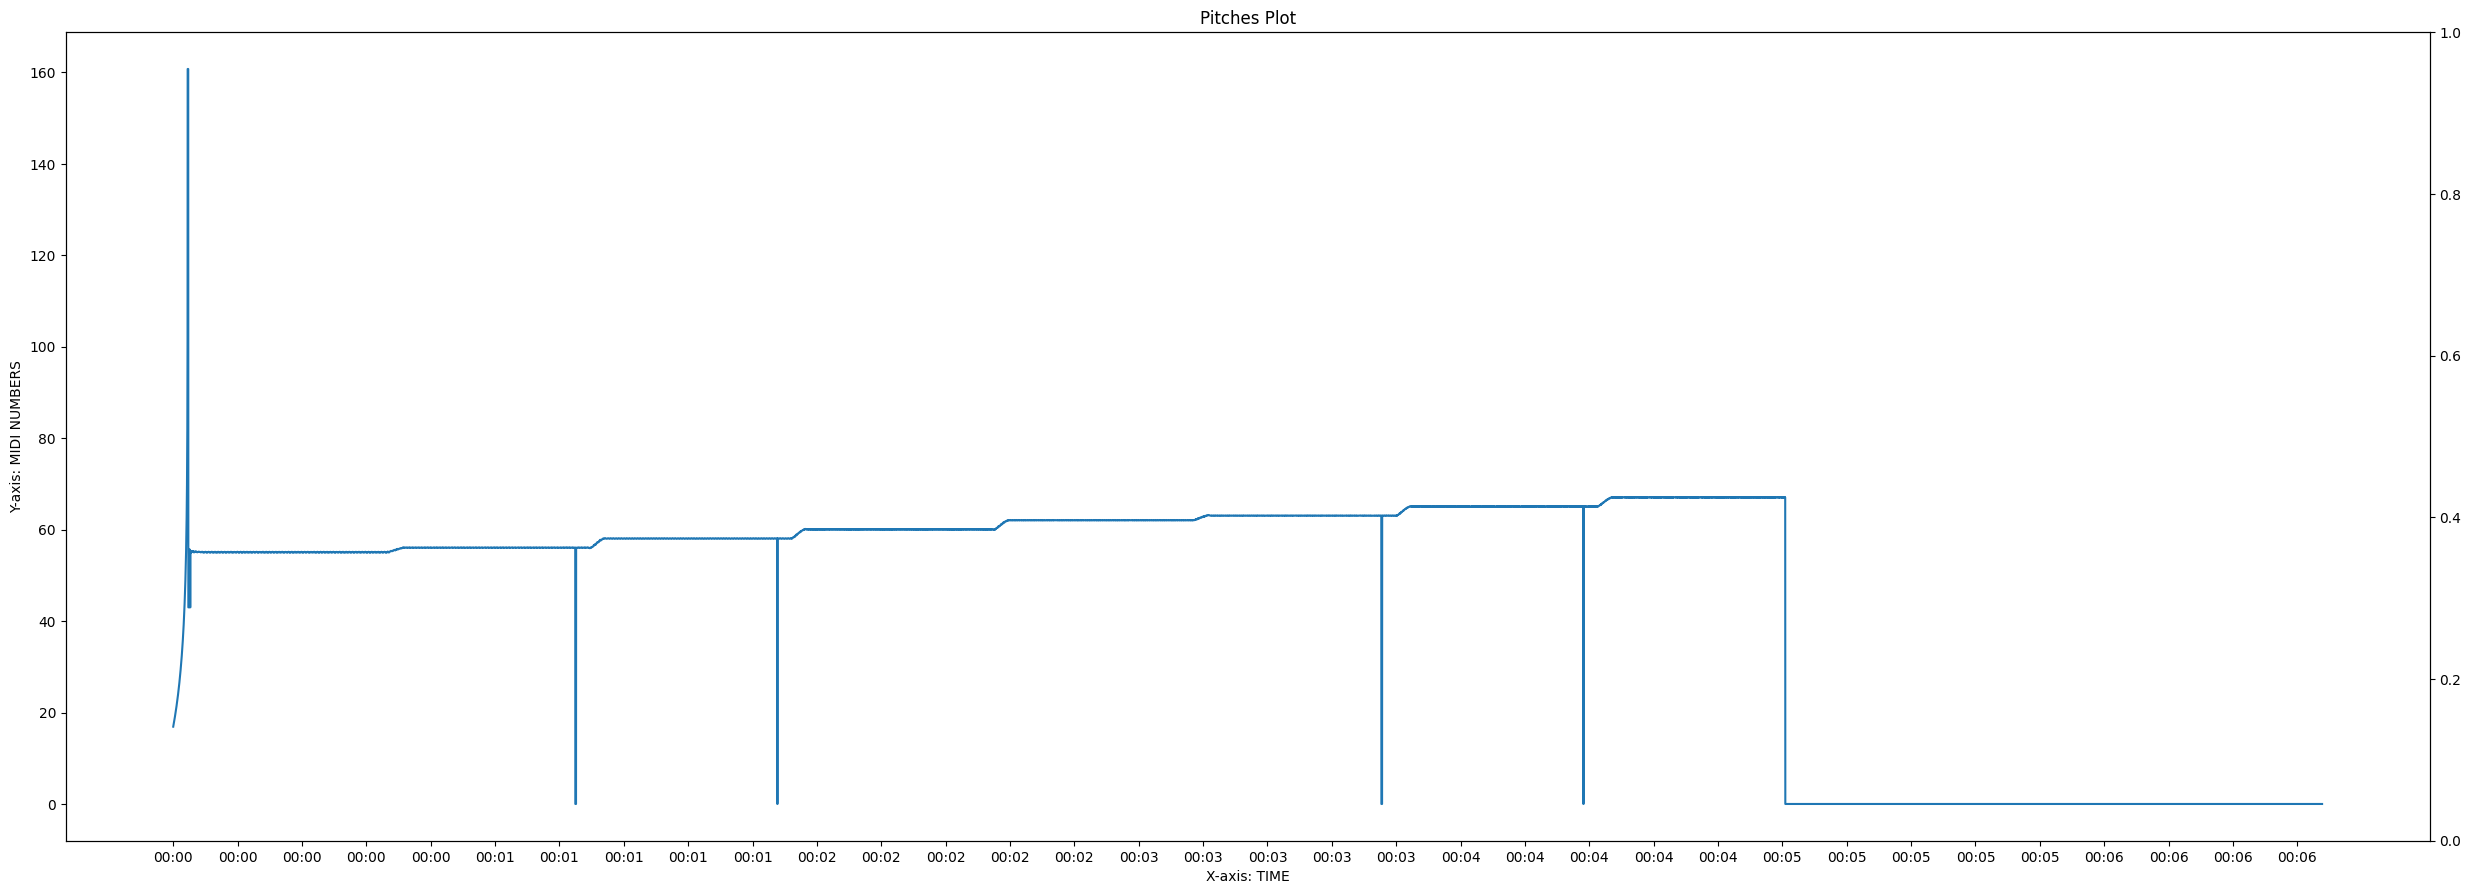

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [i for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: MIDI NUMBERS")
ax.set_title("Pitches Plot")


ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax2 = ax.twinx()
ax2.set_xticklabels([ "%02d:%02d" % (t/float(samplerate)*hop_s/60, (t/float(samplerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

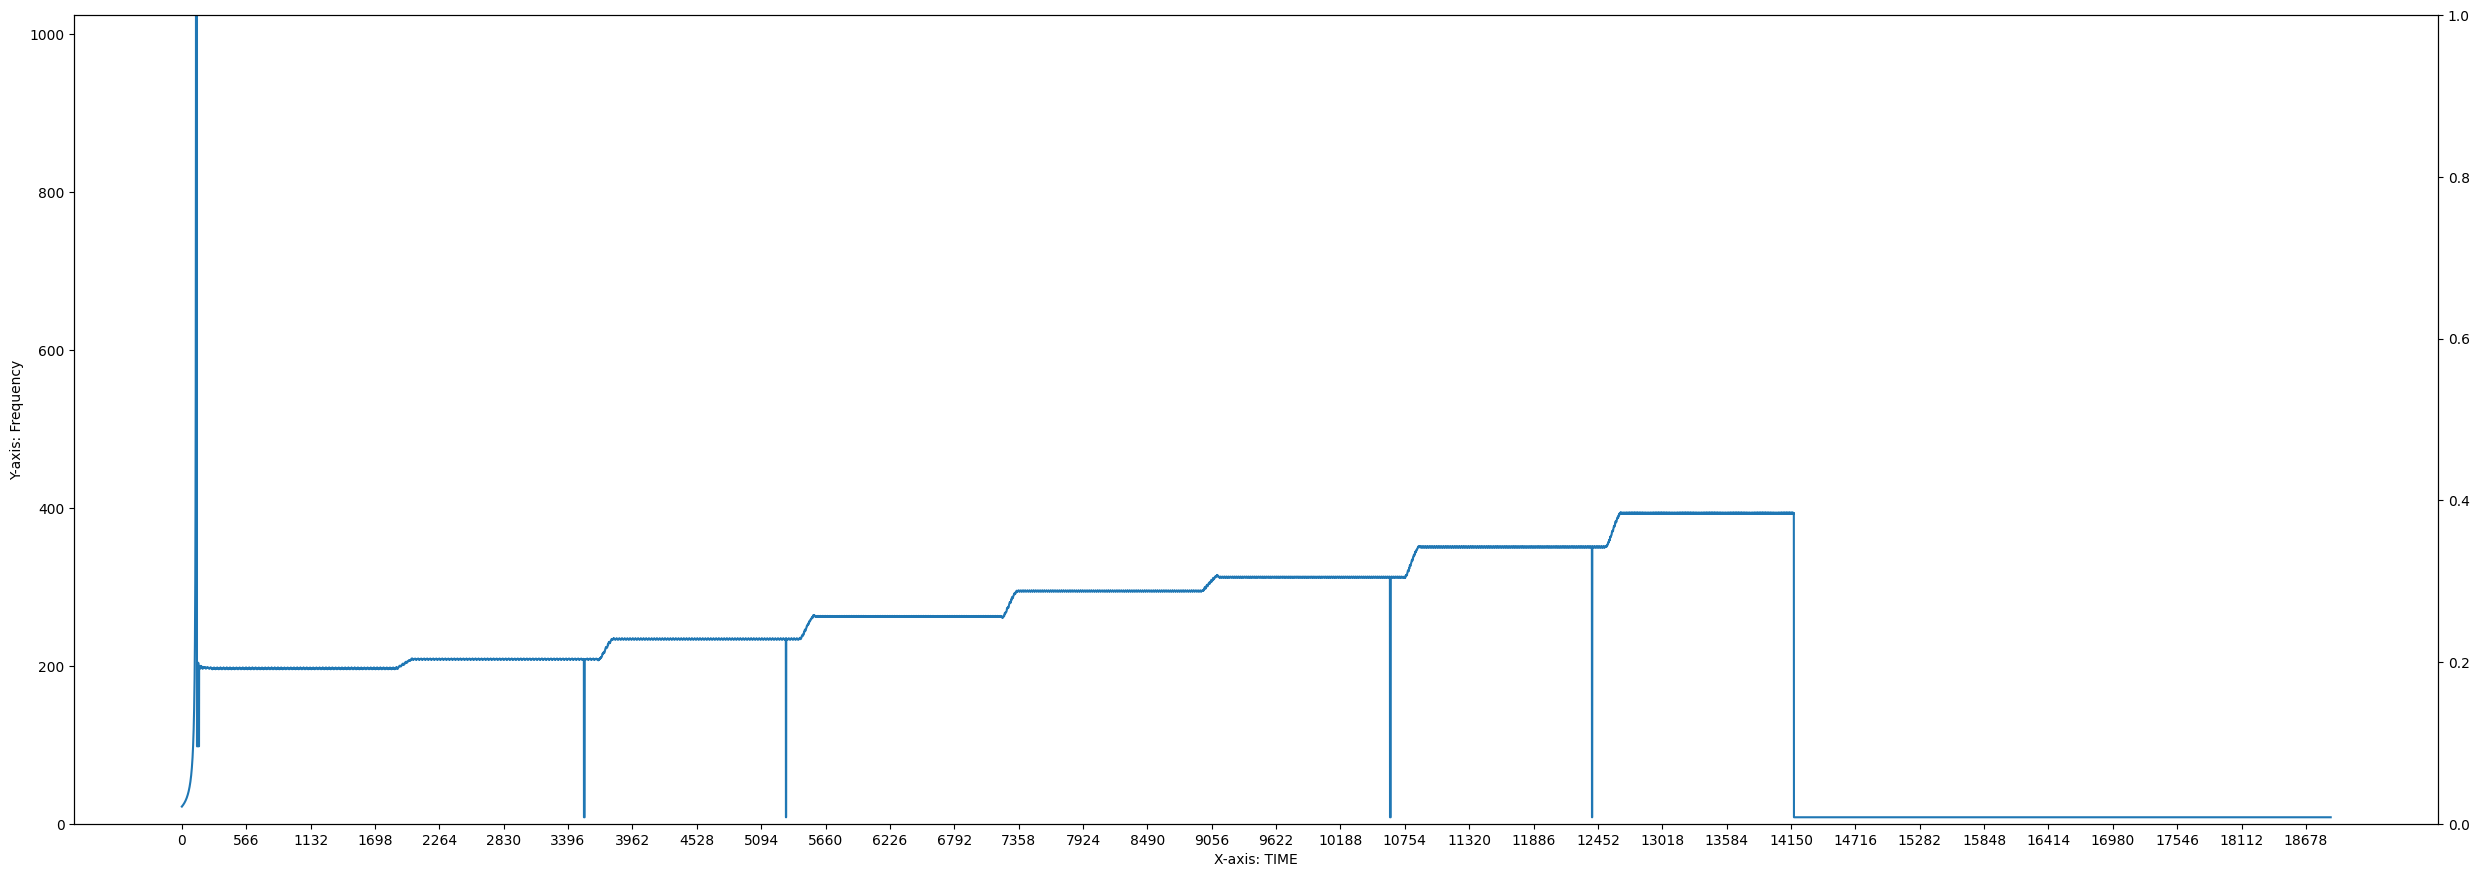

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [440*(2**((i-69)/12)) for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: Frequency")
ax.set_ylim([0, 1024])

ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax2 = ax.twinx()
#ax2.set_xticklabels([ "%02d:%02d" % (t/float(samplerate)*hop_s/60, (t/float(samplerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

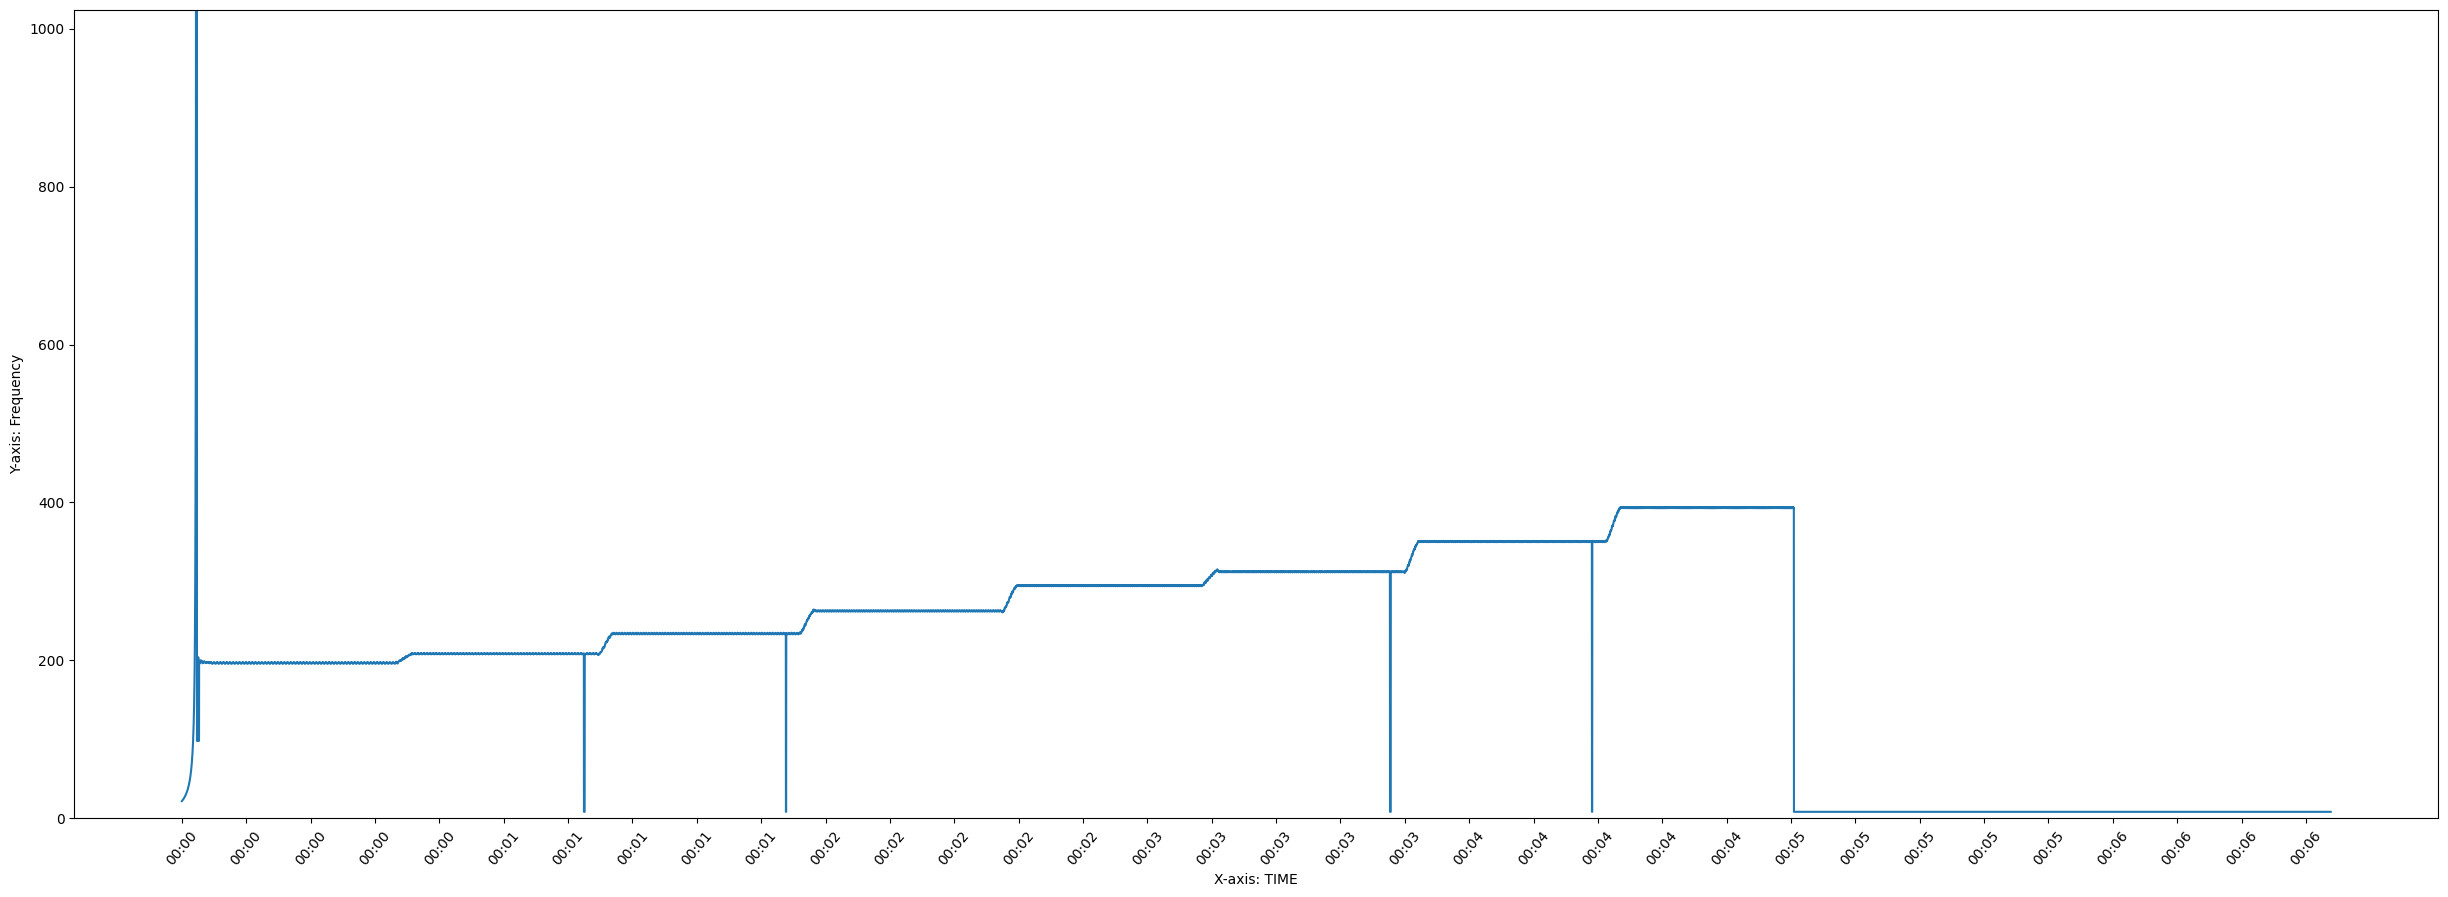

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(30.5, 10.5)
fig.set_dpi(100)

# Plot the data
ax.plot(range(len(pitches)), [440*(2**((i-69)/12)) for i in pitches])

# Add labels and a title
ax.set_xlabel("X-axis")
ax.set_xlabel("X-axis: TIME")
ax.set_ylabel("Y-axis: Frequency")
ax.set_ylim([0, 1024])

ax.set_xticks(range(0,len(pitches),int(len(pitches)*0.03)))
ax.set_xticklabels([ "%02d:%02d" % (t/float(samplerate)*hop_s/60, (t/float(samplerate)*hop_s)%60) for t in ax.get_xticks()], rotation = 50)

# Display the plot
plt.show()

In [ ]:
# ax.get_xticks()/samplerate

In [ ]:
for i in [566,2830,4528,6226,7924,9622,11320,13018]:
  print(int(pitches[i]))

55
56
58
60
62
63
65
67


In [33]:
for i in [566,2830,4528,6226,7924,9622,11320,13018]:
  print(440*(2**((pitches[i]-69)/12)))

197.79564
207.6842
234.00972
263.2439
295.5107
311.74075
350.63434
392.84714
